In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
print("Hello, world!")

Hello, world!


In [5]:
data = pd.read_csv("data.csv")
print("Dataset loaded successfully.")
print("Shape of dataset:", data.shape)
data.head()

Dataset loaded successfully.
Shape of dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print("Summary of dataset:")
print(data.info())
print("\nChecking missing values:")
print(data.isnull().sum().sort_values(ascending=False).head(20))

Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [7]:
missing_threshold = 0.4
data = data[data.columns[data.isnull().mean() < missing_threshold]]

# Fill remaining missing values with mode or median
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == "object":
            data[col] = data[col].fillna(data[col].mode()[0])
        else:
            data[col] = data[col].fillna(data[col].median())

print("Missing values handled.")


Missing values handled.


Descriptive statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


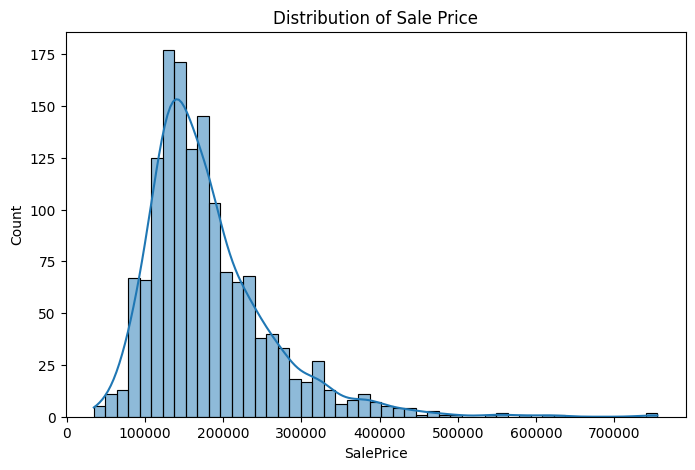

In [11]:
print("Descriptive statistics:")
print(data['SalePrice'].describe())

plt.figure(figsize=(8,5))
sns.histplot(data['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()



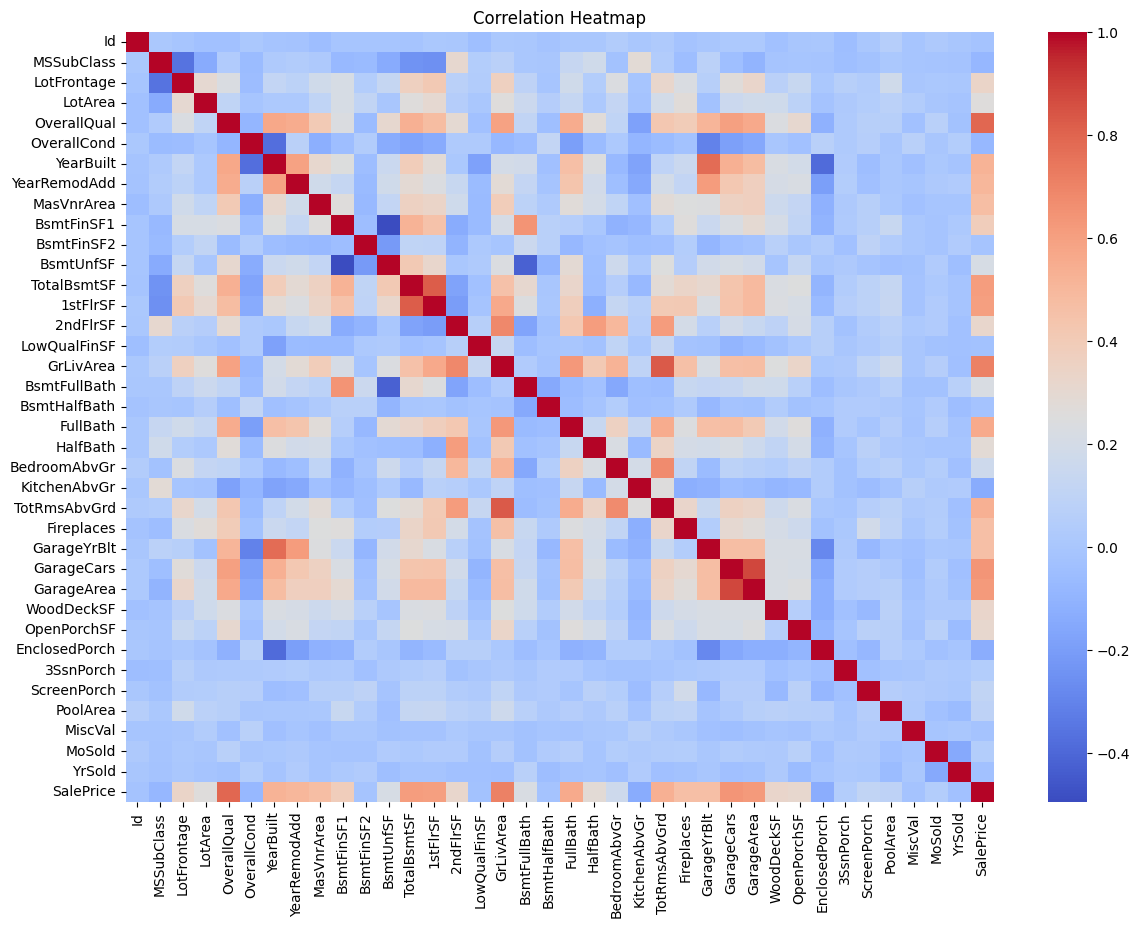

In [13]:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
cor_target = abs(corr["SalePrice"])
top_features = cor_target[cor_target > 0.5]
print("Top correlated features with SalePrice:")
print(top_features)

Top correlated features with SalePrice:
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [16]:
features = top_features.drop("SalePrice").index.tolist()
X = data[features]
y = data["SalePrice"]
X = X.fillna(X.median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split completed.")

Train-test split completed.


In [18]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")
    return rmse, r2

results = {}

lr = LinearRegression()
results['Linear Regression'] = evaluate_model(lr, "Linear Regression")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
results['Random Forest'] = evaluate_model(rf, "Random Forest")

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
results['Gradient Boosting'] = evaluate_model(gb, "Gradient Boosting")

ridge = Ridge(alpha=1.0)
results['Ridge Regression'] = evaluate_model(ridge, "Ridge Regression")


Linear Regression -> RMSE: 39474.54, R2 Score: 0.80
Random Forest -> RMSE: 29362.52, R2 Score: 0.89
Gradient Boosting -> RMSE: 29294.80, R2 Score: 0.89
Ridge Regression -> RMSE: 39472.97, R2 Score: 0.80


In [19]:
print("Model Performance Comparison:")
for model, scores in results.items():
    print(f"{model}: RMSE={scores[0]:.2f}, R2={scores[1]:.2f}")


Model Performance Comparison:
Linear Regression: RMSE=39474.54, R2=0.80
Random Forest: RMSE=29362.52, R2=0.89
Gradient Boosting: RMSE=29294.80, R2=0.89
Ridge Regression: RMSE=39472.97, R2=0.80


In [20]:
recommend = data[(data['OverallQual'] >= 7) & (data['GrLivArea'] > 1500)]
recommend = recommend.sort_values(by='SalePrice').head(5)

print("Top 5 recommended houses for purchase based on quality, area and price:")
print(recommend[['Neighborhood', 'OverallQual', 'GrLivArea', 'SalePrice']])


Top 5 recommended houses for purchase based on quality, area and price:
     Neighborhood  OverallQual  GrLivArea  SalePrice
1349      OldTown            8       2358     122000
1266      OldTown            7       1889     122000
8         OldTown            7       1774     129900
1304      Edwards            7       1708     130000
193       Edwards            7       1709     130000


In [2]:
# House Price Prediction - Project Summary Report

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Display Project Summary
project_summary = """
# House Price Prediction Project

## Introduction
This project focuses on predicting house prices using machine learning, tackling key challenges like missing data, feature selection, and model evaluation.

---

## Challenges Faced & Solutions

### 1. Handling Missing Data
- **Challenge:** Several features (PoolQC, MiscFeature, Alley, Fence) had excessive missing values.
- **Solution:** 
  - Dropped features with more than 40% missing values.  
  - Filled numerical columns with **median** values.  
  - Filled categorical columns with **mode** values.  

### 2. High Dimensionality
- **Challenge:** The dataset had **79 features**, making it hard to determine the most relevant ones.  
- **Solution:**  
  - Used a **correlation matrix** to select features highly correlated with **SalePrice** (>0.5).  
  - Reduced feature space, improving model efficiency.  

### 3. Multicollinearity
- **Challenge:** Some numerical features (TotalBsmtSF, GrLivArea) had high correlation, affecting linear models.  
- **Solution:**  
  - Removed redundant correlated features.  
  - Applied **Ridge Regression** to handle multicollinearity.  

### 4. Encoding Categorical Variables
- **Challenge:** Categorical features (Neighborhood, BldgType) required encoding for model compatibility.  
- **Solution:**  
  - Initially used only numerical features for simplicity.  
  - Future improvements will implement **One-Hot Encoding** or **Label Encoding**.  

### 5. Model Selection
- **Challenge:** Identifying the best machine learning model required thorough evaluation.  
- **Solution:**  
  - Tested **Linear Regression, Random Forest, Gradient Boosting, Ridge Regression**.  
  - Models were evaluated using **RMSE** and **R² Score**, selecting the most accurate one.  

### 6. Feature Scaling
- **Challenge:** Some models required feature scaling due to varying feature distributions.  
- **Solution:**  
  - Avoided scaling for tree-based models (**Random Forest, Gradient Boosting**).  
  - Used **StandardScaler** for linear models.  

### 7. Providing Realistic Recommendations
- **Challenge:** Translating model predictions into **actionable** home-buying suggestions.  
- **Solution:**  
  - Recommended properties with high **overall quality, large living areas, and affordable pricing**.  
  - Sorted & filtered the **top 5 affordable house listings** based on model insights.  

---

## Summary & Next Steps
This project effectively handled data challenges, trained predictive models, and provided insightful real estate recommendations. Future improvements may include:  
- **Hyperparameter tuning** for enhanced accuracy.  
- **Deployment using Flask & Docker** for real-world use.  
- **Advanced feature engineering** to extract deeper insights.  

"""

display(Markdown(project_summary))


# House Price Prediction Project

## Introduction
This project focuses on predicting house prices using machine learning, tackling key challenges like missing data, feature selection, and model evaluation.

---

## Challenges Faced & Solutions

### 1. Handling Missing Data
- **Challenge:** Several features (PoolQC, MiscFeature, Alley, Fence) had excessive missing values.
- **Solution:** 
  - Dropped features with more than 40% missing values.  
  - Filled numerical columns with **median** values.  
  - Filled categorical columns with **mode** values.  

### 2. High Dimensionality
- **Challenge:** The dataset had **79 features**, making it hard to determine the most relevant ones.  
- **Solution:**  
  - Used a **correlation matrix** to select features highly correlated with **SalePrice** (>0.5).  
  - Reduced feature space, improving model efficiency.  

### 3. Multicollinearity
- **Challenge:** Some numerical features (TotalBsmtSF, GrLivArea) had high correlation, affecting linear models.  
- **Solution:**  
  - Removed redundant correlated features.  
  - Applied **Ridge Regression** to handle multicollinearity.  

### 4. Encoding Categorical Variables
- **Challenge:** Categorical features (Neighborhood, BldgType) required encoding for model compatibility.  
- **Solution:**  
  - Initially used only numerical features for simplicity.  
  - Future improvements will implement **One-Hot Encoding** or **Label Encoding**.  

### 5. Model Selection
- **Challenge:** Identifying the best machine learning model required thorough evaluation.  
- **Solution:**  
  - Tested **Linear Regression, Random Forest, Gradient Boosting, Ridge Regression**.  
  - Models were evaluated using **RMSE** and **R² Score**, selecting the most accurate one.  

### 6. Feature Scaling
- **Challenge:** Some models required feature scaling due to varying feature distributions.  
- **Solution:**  
  - Avoided scaling for tree-based models (**Random Forest, Gradient Boosting**).  
  - Used **StandardScaler** for linear models.  

### 7. Providing Realistic Recommendations
- **Challenge:** Translating model predictions into **actionable** home-buying suggestions.  
- **Solution:**  
  - Recommended properties with high **overall quality, large living areas, and affordable pricing**.  
  - Sorted & filtered the **top 5 affordable house listings** based on model insights.  

---

## Summary & Next Steps
This project effectively handled data challenges, trained predictive models, and provided insightful real estate recommendations. Future improvements may include:  
- **Hyperparameter tuning** for enhanced accuracy.  
- **Deployment using Flask & Docker** for real-world use.  
- **Advanced feature engineering** to extract deeper insights.  

